In [40]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset
import time

In [27]:
df = pd.read_csv('data/cleaned_data.csv')
df.head()

,round_winner,player_1_team_name,player_1_name,player_1_team_num,player_1_kills_total,player_1_deaths_total,player_1_has_defuser,player_1_has_helmet,player_1_armor_value,player_1_current_equip_value,...,player_10_CZ75-Auto,player_10_Desert Eagle,player_10_R8 Revolver,player_10_Dual Berettas,player_10_Smoke Grenade,player_10_High Explosive Grenade,player_10_Flashbang,player_10_Incendiary Grenade,player_10_Molotov,player_10_Decoy Grenade
0,1,G2 Esports,NiKo,0,1,1,0,0,0.0,700.0,...,0,0,0,0,1,0,1,1,0,0
1,1,G2 Esports,NiKo,0,1,2,0,1,100.0,4100.0,...,0,0,0,0,1,1,1,1,0,0
2,0,G2 Esports,NiKo,0,1,3,0,1,100.0,5100.0,...,0,0,0,0,1,1,0,1,0,0
3,1,G2 Esports,NiKo,0,3,4,0,1,100.0,2800.0,...,0,0,0,0,1,1,0,1,0,0
4,1,G2 Esports,NiKo,0,4,5,0,0,0.0,200.0,...,0,0,0,0,1,1,1,1,0,0


In [28]:
df = df.drop(columns=[f'player_{i}_{suffix}' for i in range(1, 11) for suffix in ['team_name', 'name']])
df.head()

,round_winner,player_1_team_num,player_1_kills_total,player_1_deaths_total,player_1_has_defuser,player_1_has_helmet,player_1_armor_value,player_1_current_equip_value,player_1_balance,player_1_AK-47,...,player_10_CZ75-Auto,player_10_Desert Eagle,player_10_R8 Revolver,player_10_Dual Berettas,player_10_Smoke Grenade,player_10_High Explosive Grenade,player_10_Flashbang,player_10_Incendiary Grenade,player_10_Molotov,player_10_Decoy Grenade
0,1,0,1,1,0,0,0.0,700.0,1650,0,...,0,0,0,0,1,0,1,1,0,0
1,1,0,1,2,0,1,100.0,4100.0,150,0,...,0,0,0,0,1,1,1,1,0,0
2,0,0,1,3,0,1,100.0,5100.0,1000,1,...,0,0,0,0,1,1,0,1,0,0
3,1,0,3,4,0,1,100.0,2800.0,400,0,...,0,0,0,0,1,1,0,1,0,0
4,1,0,4,5,0,0,0.0,200.0,3100,0,...,0,0,0,0,1,1,1,1,0,0


In [29]:
X = df.drop(['round_winner'], axis=1)
y = df['round_winner']
X.head()

,player_1_team_num,player_1_kills_total,player_1_deaths_total,player_1_has_defuser,player_1_has_helmet,player_1_armor_value,player_1_current_equip_value,player_1_balance,player_1_AK-47,player_1_M4A1-S,...,player_10_CZ75-Auto,player_10_Desert Eagle,player_10_R8 Revolver,player_10_Dual Berettas,player_10_Smoke Grenade,player_10_High Explosive Grenade,player_10_Flashbang,player_10_Incendiary Grenade,player_10_Molotov,player_10_Decoy Grenade
0,0,1,1,0,0,0.0,700.0,1650,0,0,...,0,0,0,0,1,0,1,1,0,0
1,0,1,2,0,1,100.0,4100.0,150,0,0,...,0,0,0,0,1,1,1,1,0,0
2,0,1,3,0,1,100.0,5100.0,1000,1,0,...,0,0,0,0,1,1,0,1,0,0
3,0,3,4,0,1,100.0,2800.0,400,0,0,...,0,0,0,0,1,1,0,1,0,0
4,0,4,5,0,0,0.0,200.0,3100,0,0,...,0,0,0,0,1,1,1,1,0,0


In [30]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [31]:
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y.values, dtype=torch.float32).unsqueeze(1)


In [32]:
class TabularModel(nn.Module):
    def __init__(self, n_cont, out_sz, layers, p=0.5):
        super().__init__()
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        layerlist = []
        
        for i in layers:
            layerlist.append(nn.Linear(n_cont, i))
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_cont = i
        layerlist.append(nn.Linear(layers[-1], out_sz))
        
        self.layers = nn.Sequential(*layerlist)

    def forward(self, x_cont):
        x = self.bn_cont(x_cont)
        x = self.layers(x)
        return x

In [47]:
torch.manual_seed(33)

In [48]:
model = TabularModel(n_cont=X.shape[1], out_sz=1, layers=[200,100], p=0.4)

In [49]:
model

TabularModel(
  (bn_cont): BatchNorm1d(470, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=470, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=1, bias=True)
  )
)

In [50]:
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
batch_size = 128  
train_data = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

In [52]:
epochs = 500
losses = []
clip_value = 1.0

In [53]:
start_time = time.time()
for epoch in range(epochs):
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), clip_value)
        optimizer.step()
    if epoch % 25 == 0:
        print(f'epoch: {epoch:3}  loss: {loss.item():10.8f}')
    losses.append(loss.item())

print(f'Final epoch: {epochs-1:3}  loss: {loss.item():10.8f}')
print(f'\nDuration: {time.time() - start_time:.0f} seconds')

epoch:   0  loss: 0.48391140
epoch:  25  loss: 0.50438303
epoch:  50  loss: 0.12056193
epoch:  75  loss: 0.08617467
epoch: 100  loss: 1.22486973
epoch: 125  loss: 0.71979433
epoch: 150  loss: 0.47286540
epoch: 175  loss: 0.00237107
epoch: 200  loss: 0.94748938
epoch: 225  loss: 0.62872523
epoch: 250  loss: 2.26783705
epoch: 275  loss: 0.00076003
epoch: 300  loss: 0.47239682
epoch: 325  loss: 0.00506934
epoch: 350  loss: 0.88705832
epoch: 375  loss: 0.04925130
epoch: 400  loss: 1.27598035
epoch: 425  loss: 0.00000238
epoch: 450  loss: 0.00022570
epoch: 475  loss: 0.54952478
Final epoch: 499  loss: 0.75523514

Duration: 130 seconds


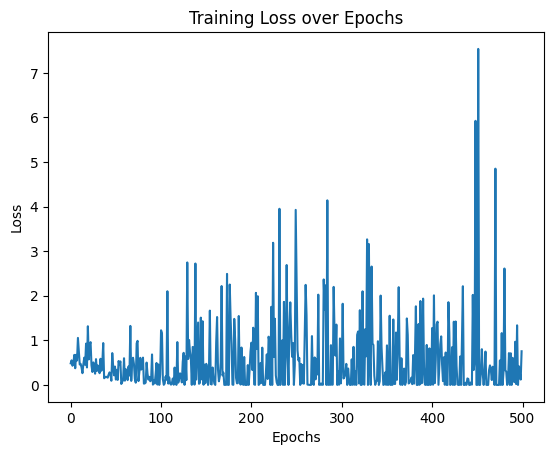

In [54]:
plt.plot(range(epochs), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.show()

In [55]:
model.eval()
with torch.no_grad():
    y_test_pred = model(X_test)
    test_loss = criterion(y_test_pred, y_test)
    y_test_pred = torch.sigmoid(y_test_pred)
    y_test_pred = (y_test_pred > 0.5).float()
    accuracy = (y_test_pred == y_test).float().mean()
    print(f'Test Loss: {test_loss.item():10.8f}')
    print(f'Test Accuracy: {accuracy.item():10.8f}')

Test Loss: 5.75225687
Test Accuracy: 0.72150409
